In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf


In [ ]:
import os


In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
bas='/content/drive/MyDrive/data1a'

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread


In [ ]:
os.listdir(bas)

['training', 'validation']

In [ ]:
test_path=bas+'/validation'
train_pth=bas+'/training'

In [ ]:
os.listdir(test_path)


['01-whole', '00-damage']

In [ ]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_pth+'/01-whole'):
 
 img = imread(train_pth+'/01-whole'+'/'+image_filename)
 
 dim1.append(img.shape[0])
 dim2.append(img.shape[1])

In [ ]:
img.shape

(169, 299, 3)

In [ ]:
np.mean(dim1)


432.90434782608696

In [ ]:
np.mean(dim2)

628.8445652173913

In [ ]:
image_shape=(int(np.mean(dim1)),int(np.mean(dim2)),3)
image_shape[:2]

(432, 628)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen=ImageDataGenerator(rotation_range=20,# rotate the image 20 degrees
 width_shift_range=0.1,# Shift the pic width by a max of 5%
 height_shift_range=0.1,# Shift the pic height by a max of 5%
 fill_mode='nearest',# Fill in missing pixels with the nearest filled value
 shear_range=0.1,# Shear means cutting away part of the image (max 10%)
 zoom_range=0.1, # Zoom in by 10% max
 horizontal_flip=True,# Allow horizontal flipping
 rescale=1/255 # Rescale the image by normalzing it.
 
 )

In [ ]:

image_gen.flow_from_directory(train_pth)

Found 1840 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)


Found 460 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential


In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
batch_size=25

In [ ]:
train_img_gen=image_gen.flow_from_directory(train_pth,
 target_size=image_shape[:2],
 color_mode='rgb',
 batch_size=batch_size,
 class_mode='binary')


Found 1840 images belonging to 2 classes.


In [ ]:
test_img_gen=image_gen.flow_from_directory(test_path,
 target_size=image_shape[:2],
 color_mode='rgb',
 batch_size=batch_size,
 class_mode='binary',
 shuffle=False)

Found 460 images belonging to 2 classes.


In [ ]:
train_img_gen.class_indices

{'00-damage': 0, '01-whole': 1}

In [ ]:
result=model.fit_generator(train_img_gen,epochs=15,
 validation_data=test_img_gen,
 callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
74/74 [==============================] - 1040s 14s/step - loss: 0.9137 - accuracy: 0.5511 - val_loss: 0.6566 - val_accuracy: 0.6261
Epoch 2/15
74/74 [==============================] - 864s 12s/step - loss: 0.6523 - accuracy: 0.6462 - val_loss: 0.6242 - val_accuracy: 0.6870
Epoch 3/15
74/74 [==============================] - 861s 12s/step - loss: 0.6194 - accuracy: 0.6658 - val_loss: 0.6178 - val_accuracy: 0.6870
Epoch 4/15
74/74 [==============================] - 861s 12s/step - loss: 0.6167 - accuracy: 0.6712 - val_loss: 0.6262 - val_accuracy: 0.6630
Epoch 5/15
74/74 [==============================] - 873s 12s/step - loss: 0.5770 - accuracy: 0.7082 - val_loss: 0.5639 - val_accuracy: 0.7043
Epoch 6/15
74/74 [==============================] - 861s 12s/step - loss: 0.5324 - accuracy: 0.7462 - val_loss: 0.5187 - val_accuracy: 0.7543
Epoch 7/15
74/74 [==============================] - 862s 12s/step - loss: 0.4999 - accuracy: 0.7712 - val_loss: 0.4711 - val_accuracy: 0.7804
Epoch

In [ ]:

model.history.history


{'accuracy': [0.551086962223053,
  0.646195650100708,
  0.66576087474823,
  0.6711956262588501,
  0.708152174949646,
  0.7461956739425659,
  0.771195650100708,
  0.7994565367698669,
  0.813586950302124],
 'loss': [0.9136809706687927,
  0.652274489402771,
  0.619365930557251,
  0.6166511178016663,
  0.5770050883293152,
  0.5323584675788879,
  0.49988141655921936,
  0.4563550651073456,
  0.4166817367076874],
 'val_accuracy': [0.626086950302124,
  0.686956524848938,
  0.686956524848938,
  0.6630434989929199,
  0.7043478488922119,
  0.7543478012084961,
  0.780434787273407,
  0.7673913240432739,
  0.810869574546814],
 'val_loss': [0.6565501093864441,
  0.6242243647575378,
  0.6177787184715271,
  0.6262443661689758,
  0.5639370083808899,
  0.5187068581581116,
  0.4710609018802643,
  0.4751318693161011,
  0.49506258964538574]}

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.913681,0.551087,0.656550,0.626087
1,0.652274,0.646196,0.624224,0.686957
2,0.619366,0.665761,0.617779,0.686957
3,0.616651,0.671196,0.626244,0.663043
4,0.577005,0.708152,0.563937,0.704348
5,0.532358,0.746196,0.518707,0.754348
6,0.499881,0.771196,0.471061,0.780435
7,0.456355,0.799457,0.475132,0.767391
8,0.416682,0.813587,0.495063,0.810870


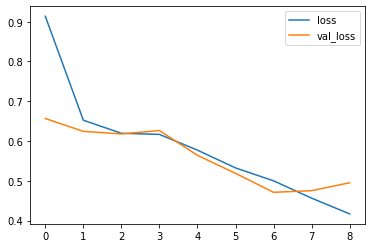

In [ ]:
losses[['loss','val_loss']].plot()